# Performance measures

In our introductory demonstration of machine learning using the diabetes dataset, not only did we set aside just five examples as a test set, we did not perform any quantitative analysis using the test data. 

Measuring model performance is a major topic in machine learning. To get a sense of this, skim [this page](https://scikit-learn.org/stable/modules/model_evaluation.html)
from the scikit-learn web page. This is far too much detail for our needs. 

Here we will look at the `residual` and then four quantitative metrics that can be used to  measure the performance of prediction from a regression model:
- mean squared error
- root mean squared error
- mean absolute error
- R2 (R squared) 


We will again use the diabetes dataset as our example.

---

### Import libraries 

We will need `r2_score` and so import it in the cell below.

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Note: the cell above should give you a good idea of what you need to import for Assignment 4. (There is one thing above you won't need and one additional thing you will need.)

---

## Example: Diabetes dataset

Since we have now learned how to load data, split the data, train the model and predict, we do all the tasks in a single compute cell. 


In [2]:
# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)

# Create a train-test split with a test size of 20% of the total samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X_train, y_train)

# Use the model to predict the test data
y_pred = regr.predict(X_test)

We now have our predicted target values `y_pred` on the test set `X_test`. The question is, how good are they? 

We have the corresponding target values `y_test` from the dataset itself. We treat these as truth. So all we need to do is compare `y_pred` with `y_test`. 

---

# The residual

In numerical analysis, the [residual](https://en.wikipedia.org/wiki/Residual_(numerical_analysis)) is the difference between exact and approximate values. In our machine-learning examples, the residual is just `y_test - y_pred`. The cell below computes residual and plots it as a function of the target `y`. (Recall that the target we are predicting is the disease progression after one year.)

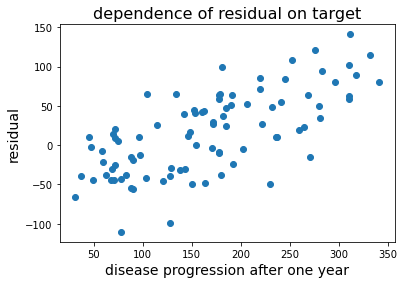

In [3]:
resid = y_test - y_pred
plt.scatter(y_test, resid)
plt.xlabel("disease progression after one year", fontsize="14")
plt.ylabel("residual", fontsize="14")
plt.title("dependence of residual on target", fontsize="16")
plt.show()

One clearly sees in this plot that the residual, the error, varies systematically with target. This is clearly useful information about model performance. In practice one might do something with this information.

---

## Performance metrics

We now look at the four performance metrics. These are scalar measures of how well `y_test` and `y_pred` agree.

---
#### mean squared error (MSE)

The definition is in the name. You can find a general description [here](https://en.wikipedia.org/wiki/Mean_squared_error). We turn directly to the implementation in Python. 


In [4]:
# Directly from the definition
MSE = np.mean((y_test - y_pred)**2)
print(MSE)

2957.81881125211


In [5]:
# or from the the residual
MSE = np.mean(resid**2)
print(MSE)

2957.81881125211


---
#### root mean squared error (RMSE)

Again, the definition is in the name. We simply take the square root of the MSE. For example


In [6]:
RMSE = np.sqrt(np.mean(resid**2))
print(RMSE)

54.38583281749127


---
#### mean absolute error (MAE)

Once again, the definition is in the name. 

In [7]:
MAE = np.mean(np.abs(resid))
print(MAE)

44.96894743608768


For each of the above metrics, smaller is clearly better. Smaller errors correspond to smaller differences between `y_pred` and `y_test`, and hence better predictions.

---


#### R squared (R^2)

Here the definition is not in the name. R squared is known as the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination). It plays a significant role in evaluating machine learning models, and hence you should be aware of it. However, it is not sufficiently important in our brief study of machine learning to warrant a detailed discussion. There are three things you need to know:  

- There is a scikit-learn function to compute it.
- For R2, bigger is better. R2=1 corresponds to perfect predictions, ie. `y_pred = y_test`. Very good predictions give R2 > 0.9.
- It is not a function of `resid` only. One needs both `y_test` and `y_pred`.

In [8]:
# using scikit-learn to compute R2 (note that r2_score was imported above)
R2 = r2_score(y_test, y_pred)
print(R2)

0.5504258780233245


In [9]:
# showing that y_pred = y_test indeed gives R2=1
R2_perfect = r2_score(y_test, y_test)
print(R2_perfect)

1.0


---

A Python definition of R2 is given by


In [ ]:
1 - np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_test))**2)

which you can convert into a mathematical expression. Or, if you are interested in further details, we suggest the [wikipedia page](https://en.wikipedia.org/wiki/Coefficient_of_determination) or 
[this page](https://scikit-learn.org/stable/modules/model_evaluation.html).

---